In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('../data/processed/houses.csv')

In [30]:
df.head()

,house_type,address,region,area,sup_area,rooms,land_area,monthly_fee,date_sold,broker,...,is_condo,total_area,price_per_sqm,price_per_tsqm,list_price,price_tkr,listprice_tkr,year,month,running_month
0,Radhus,Hollywoodvägen 15,ROTEBRO,96.0,0.0,3.0,397.0,0.0,2020-01-24,Fastighetsbyrån,...,False,96.0,39531.250000,39531.250000,3795000.0,3795.0,3795.0,2020,1,85
1,Radhus,Pukvägen 4,VIBY,128.0,24.0,6.0,320.0,0.0,2020-01-23,Fastighetsbyrån,...,False,152.0,38671.875000,32565.789474,5000000.0,4950.0,5000.0,2020,1,85
2,Radhus,Solängsvägen 92,SOLÄNGEN,140.0,0.0,5.0,260.0,0.0,2020-01-23,HusmanHagberg,...,False,140.0,39464.285714,39464.285714,4933000.0,5525.0,4933.0,2020,1,85
3,Radhus,Västervägen 14C,HÄGGVIK,105.0,4.0,5.0,414.0,0.0,2020-01-22,Fastighetsbyrån,...,False,109.0,47619.047619,45871.559633,4854000.0,5000.0,4854.0,2020,1,85
4,Radhus,Koltrastvägen 56,SJÖBERG,137.0,0.0,6.0,173.0,0.0,2020-01-22,Länsförsäkringar,...,False,137.0,46350.364964,46350.364964,5991000.0,6350.0,5991.0,2020,1,85


In [31]:
df.columns

Index(['house_type', 'address', 'region', 'area', 'sup_area', 'rooms',
       'land_area', 'monthly_fee', 'date_sold', 'broker', 'price_change',
       'price', 'is_condo', 'total_area', 'price_per_sqm', 'price_per_tsqm',
       'list_price', 'price_tkr', 'listprice_tkr', 'year', 'month',
       'running_month'],
      dtype='object')

# Price

In [32]:
df.price_tkr.describe()

count     1963.000000
mean      5814.385971
std       2344.180938
min       1450.000000
25%       4122.500000
50%       5400.000000
75%       7122.500000
max      21175.000000
Name: price_tkr, dtype: float64

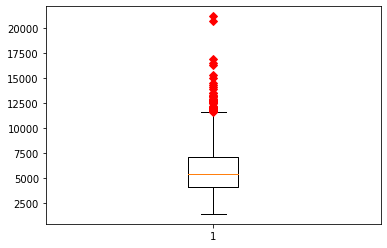

In [33]:
plt.boxplot(df.price_tkr, 0, 'rD')
plt.show()

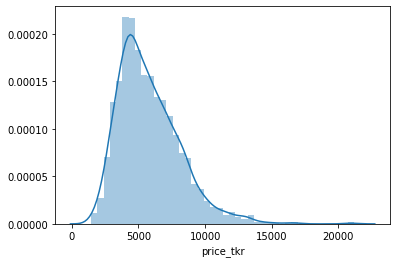

In [34]:
sns.distplot(df.price_tkr)
plt.show()

In [35]:
print("Skewness:", df.price_tkr.skew())
print("Kurtosis:", df.price_tkr.kurt())

Skewness: 1.1875561701976423
Kurtosis: 2.739191847526987


- Deviates from normal distribution
- Kurtosis < 3 -- flatter
- Skewness > 0 -- positively skewed (tail to right)

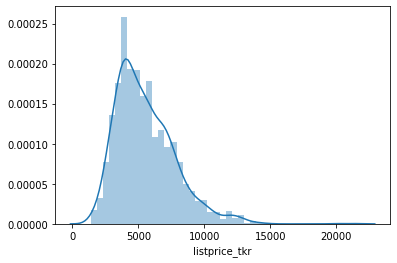

In [36]:
sns.distplot(df.listprice_tkr)
plt.show()

# Area

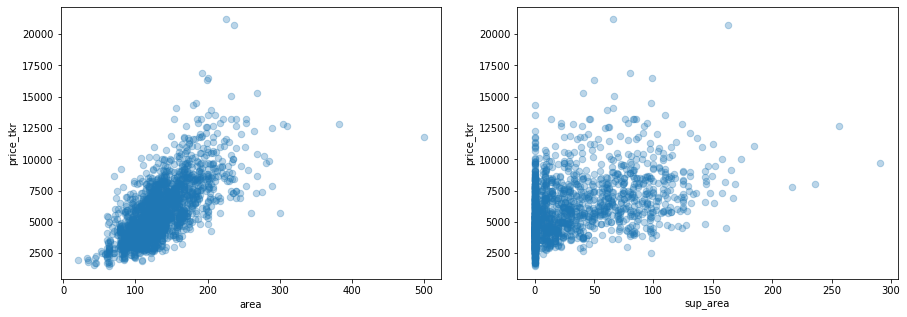

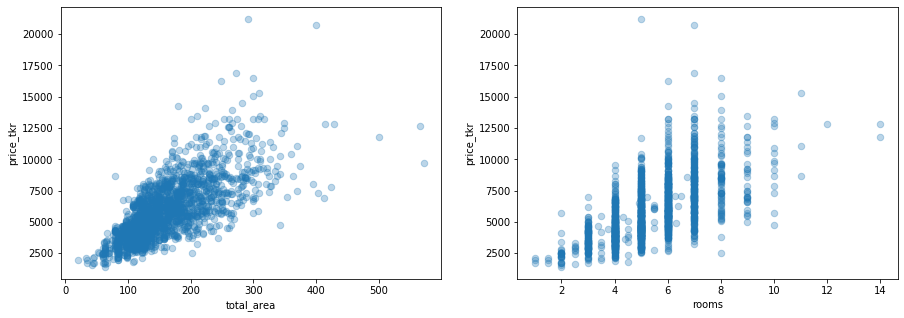

In [37]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
df.plot(kind='scatter', x='area', y='price_tkr', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='sup_area', y='price_tkr', s=42, alpha=0.3, ax=axis2)
plt.show()
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
df.plot(kind='scatter', x='total_area', y='price_tkr', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='rooms', y='price_tkr', s=42, alpha=0.3, ax=axis2)
plt.show()

Very high correlation between price and area/total_areal/rooms -- should probably only use one feature

# Land Area, Monthly Fee, Is_condo

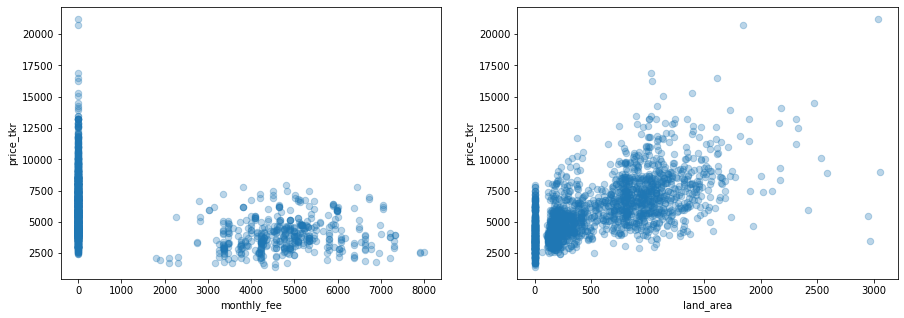

In [38]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind='scatter', x='monthly_fee', y='price_tkr', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='land_area', y='price_tkr', s=42, alpha=0.3, ax=axis2)
plt.show()

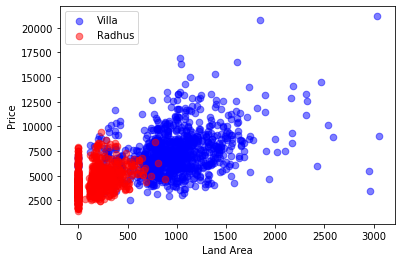

In [40]:
plt.scatter(df[df.house_type == 'Villa'].land_area, df[df.house_type == 'Villa'].price_tkr, 
            s=44, c='blue', alpha=0.5, label='Villa')
plt.scatter(df[df.house_type == 'Radhus'].land_area, df[df.house_type == 'Radhus'].price_tkr, 
            s=44, c='red', alpha=0.5, label='Radhus')
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
df.house_type.value_counts()

Radhus    992
Villa     971
Name: house_type, dtype: int64

In [42]:
def box(indep_var, dep_var):
    data = pd.concat([df[dep_var], df[indep_var]], axis=1)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.boxplot(x=indep_var, y=dep_var, data=data, ax=ax)
    plt.show()

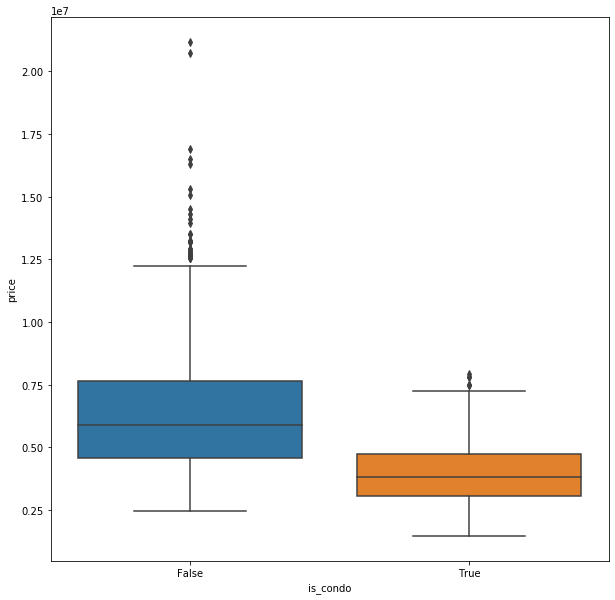

In [43]:
box('is_condo', 'price')

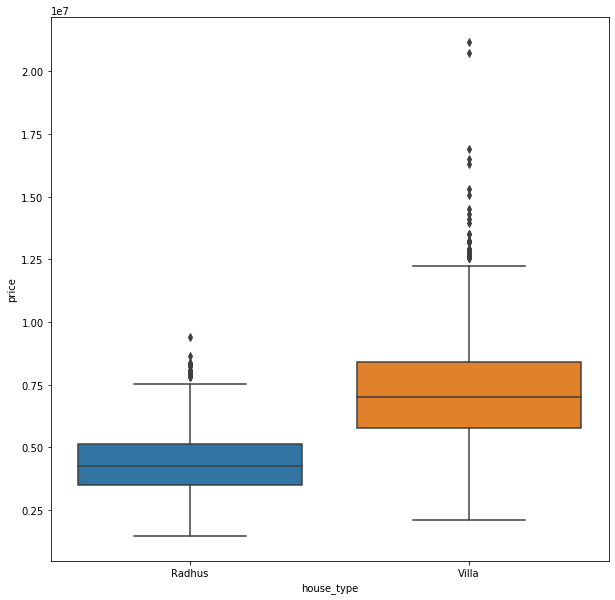

In [47]:
box('house_type', 'price')

# Date sold

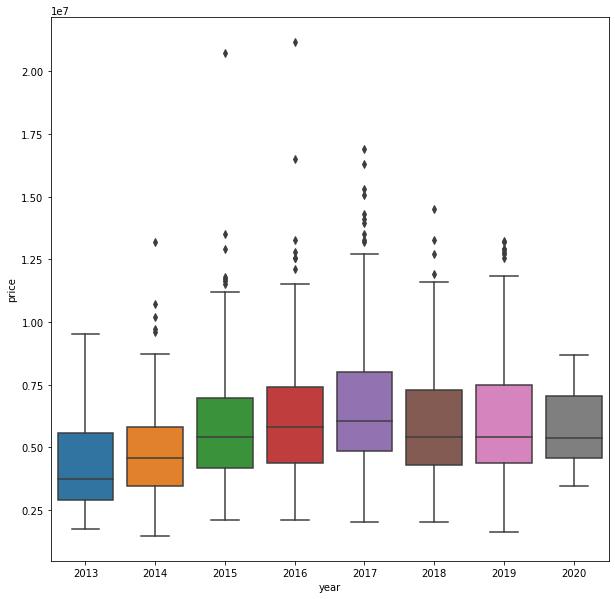

In [44]:
box('year', 'price')

Prices year by year -- it continously went up and then the market took a dive in 2018

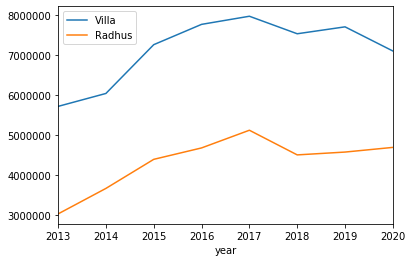

In [49]:
df_yoy_house = df[df.house_type == 'Villa'].groupby(['year'])
df_yoy_house['price'].mean().plot(kind='line', label='Villa')
df_yoy_townhome = df[df.house_type == 'Radhus'].groupby(['year'])
df_yoy_townhome['price'].mean().plot(kind='line', label='Radhus')
plt.legend()
plt.show()

Separating by Radhus/Villa it looks like Radhus is on the road to recovery while Villas are still dropping

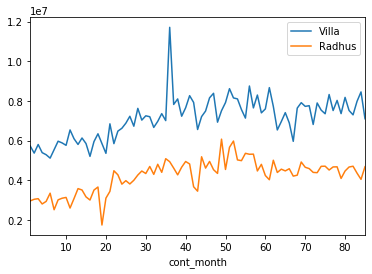

In [48]:
df['cont_month'] = df.apply(lambda row: (row['year']-2013)*12 + row['month'], axis=1)
df_mom_house = df[df.house_type == 'Villa'].groupby(['cont_month'])
df_mom_house['price'].mean().plot(kind='line', label='Villa')
df_mom_townhome = df[df.house_type == 'Radhus'].groupby(['cont_month'])
df_mom_townhome['price'].mean().plot(kind='line', label='Radhus')
plt.legend()
plt.show()

Interesting Villa spike around Jan 2016

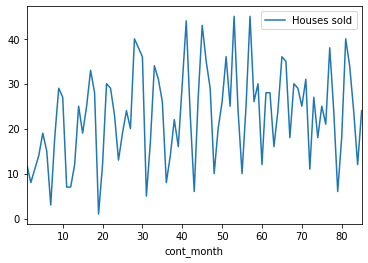

In [50]:
df.groupby(['cont_month'])['price'].count().plot(kind='line', label='Houses sold')
plt.legend()
plt.show()

We have a bit of a dip, every xmas and summer (when everyone is on vacation) in houses sold

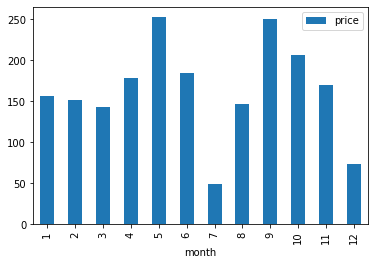

In [51]:
df.groupby(['month'])['price'].count().plot(kind='bar')
plt.legend()
plt.show()

it can be seen better here... most people sell in May or September

## Price change percent year over year

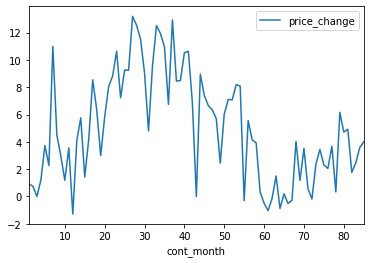

In [94]:
df['cont_month'] = df.apply(lambda row: (row['year']-2013)*12 + row['month'], axis=1)
df_mom_house = df.groupby(['cont_month'])
df_mom_house['price_change'].mean().plot(kind='line')
plt.legend()
plt.show()

# Region

This shoudl be interesting - we know that real-estate is always **LOCATION LOCATION LOCATION**

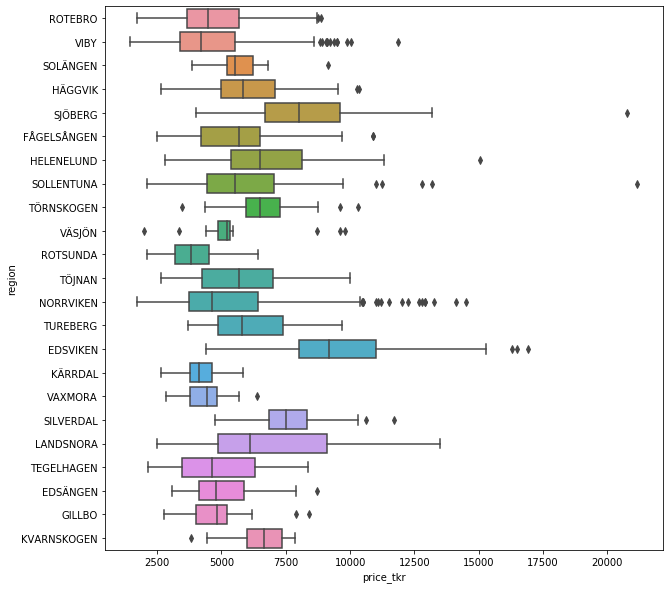

In [56]:
data = pd.concat([df.region, df.price_tkr], axis=1)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='price_tkr', y='region', data=data, ax=ax, orient="h")
plt.show()

In [58]:
df_by_region_count = df.groupby(['region'])['price_tkr'].agg(['mean', 'count']).sort_values(by=['mean'], ascending=False)
df_by_region_count

,mean,count
region,,
EDSVIKEN,9607.655831,118
SJÖBERG,8226.727273,55
SILVERDAL,7660.522388,67
LANDSNORA,7036.816327,49
HELENELUND,6636.043478,115
TÖRNSKOGEN,6559.137931,58
KVARNSKOGEN,6443.111111,18
TUREBERG,6169.574468,47
HÄGGVIK,6003.508411,107


# Broker

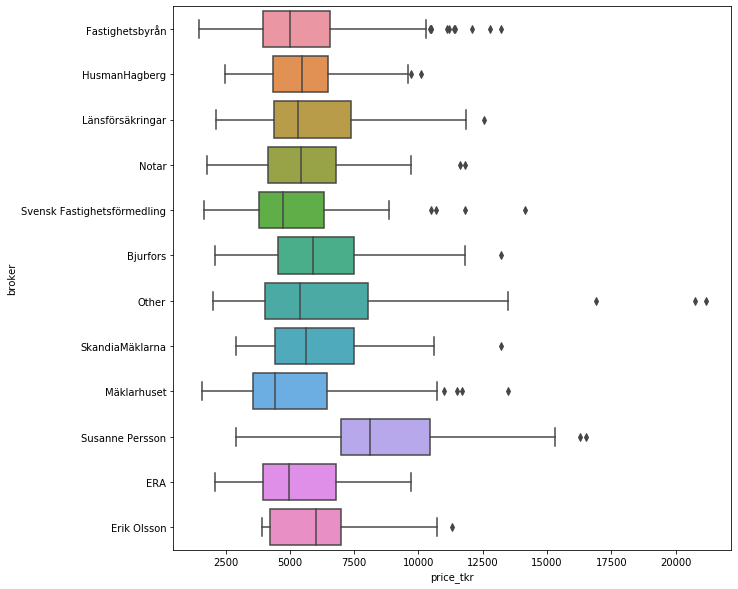

In [59]:
data = pd.concat([df.broker, df.price_tkr], axis=1)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='price_tkr', y='broker', data=data, ax=ax, orient="h")
plt.show()

Susanne Persson usually sells the more expensive houses... hard to know what is cause and effect though

# Correlation

let's focus on a few columns, removing some of the extras

In [64]:
df.drop(['price_per_sqm', 'price_per_tsqm', 'price_tkr', 'listprice_tkr', 'list_price', 'cont_month'], axis=1, inplace=True)

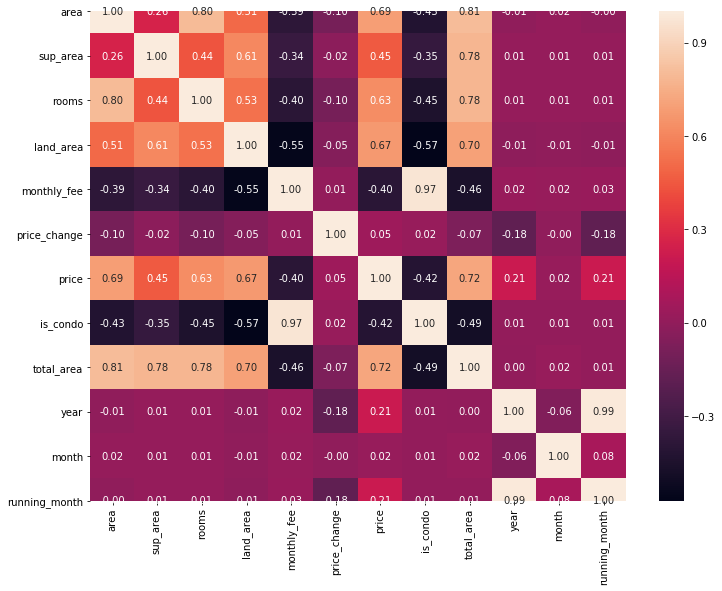

In [72]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, fmt='.2f', annot=True);
plt.show()

Some fields are just too highly correlated for us to use both of them in the model

In [66]:
corrmat

,area,sup_area,rooms,land_area,monthly_fee,price_change,price,is_condo,total_area,year,month,running_month
area,1.000000,0.260988,0.800281,0.507348,-0.386761,-0.095978,0.688141,-0.427348,0.805273,-0.006762,0.015161,-0.004577
sup_area,0.260988,1.000000,0.437366,0.611829,-0.338636,-0.015645,0.454224,-0.348855,0.782522,0.013038,0.012894,0.014867
rooms,0.800281,0.437366,1.000000,0.530268,-0.397747,-0.098102,0.626403,-0.445368,0.784789,0.012727,0.012716,0.014531
land_area,0.507348,0.611829,0.530268,1.000000,-0.554937,-0.047830,0.673280,-0.572407,0.703007,-0.011419,-0.005560,-0.012198
monthly_fee,-0.386761,-0.338636,-0.397747,-0.554937,1.000000,0.008513,-0.395321,0.969479,-0.457439,0.023725,0.020199,0.026585
price_change,-0.095978,-0.015645,-0.098102,-0.047830,0.008513,1.000000,0.045723,0.017377,-0.071513,-0.181391,-0.003955,-0.181677
price,0.688141,0.454224,0.626403,0.673280,-0.395321,0.045723,1.000000,-0.416332,0.722815,0.208256,0.019040,0.210663
is_condo,-0.427348,-0.348855,-0.445368,-0.572407,0.969479,0.017377,-0.416332,1.000000,-0.489893,0.007906,0.010876,0.009454
total_area,0.805273,0.782522,0.784789,0.703007,-0.457439,-0.071513,0.722815,-0.489893,1.000000,0.003647,0.017698,0.006179
year,-0.006762,0.013038,0.012727,-0.011419,0.023725,-0.181391,0.208256,0.007906,0.003647,1.000000,-0.060985,0.989703


# Baseline RMSE 

how far off are we if we just predict avg price or something simple

In [74]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

## Average price

In [76]:
mean_price = df.price.mean()
df['prediction'] = df.price.apply(lambda row: mean_price)

In [77]:
baseline_rmse = rmse(df.price, df.prediction)
baseline_rmse

2343583.770790677

2.3 million kr off -- I bet we can beat that

## Average for condo or not

In [89]:
avg_condo = df[df.is_condo == 1].price.mean()
avg_not_condo = df[df.is_condo == 0].price.mean()

In [91]:
df['prediction'] = df.is_condo.apply(lambda is_condo: avg_condo if is_condo == 1 else avg_not_condo)

In [92]:
baseline_rmse = rmse(df.price, df.prediction)
baseline_rmse

2130816.016312427

## Average price per sqm

In [83]:
df = pd.read_csv('../data/processed/houses.csv')

In [88]:
avg_price_per_sqm = df.price_per_sqm.mean()
df['prediction'] = df.area.apply(lambda area: area * avg_price_per_sqm)

In [86]:
baseline_rmse = rmse(df.price, df.prediction)
baseline_rmse

1706671.2770830044

So a diff of 1.7 million is the number to beat